In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red">ch10_N차원 배열 다루기_part.2</font></b>

# 4절. 복사와 뷰
## 4.1 할당

In [2]:
import numpy as np

In [3]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [10]:
b = a 
b

array([0, 1, 2, 3, 4, 5])

In [5]:
# a와 b가 같은 객체냐?
a is b

True

In [11]:
b.reshape((2,3))

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 view
- 슬라이싱할 경우 자동 view 생성

In [13]:
c = np.arange(12).reshape(2,-1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [19]:
d = c.view()  # c의 뷰를 생성
print(c)
print(d)
print(d is c) # c객체와 d객체가 같냐?
print(np.all(c==d)) # 각 요소의 값은 같으냐?
print(id(c), id(d)) # 역시 주소는 다름

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
False
True
2217431719280 2217419354448


In [28]:
d.shape = (3,4)  # d 구조를 바꾸자 d의 구조만 바뀌었다
d ,c

(array([[-99,   1, -99,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]]),
 array([[-99,   1, -99,   3,   4,   5],
        [  6,   7,   8,   9,  10,  11]]))

In [29]:
d[0,::2] = -99  # d의 값을 바꾸자, c의 값은 바뀌었다
d, c

(array([[-99,   1, -99,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]]),
 array([[-99,   1, -99,   3,   4,   5],
        [  6,   7,   8,   9,  10,  11]]))

In [30]:
# 슬라이싱이 될 때 자동뷰가 반환됨
c = np.arange(12).reshape(2,-1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [31]:
d = c[:, :-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

## 4.3 깊은 복사

In [32]:
c = np.arange(12).reshape(2,-1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [38]:
d = c[:,:-1].copy()  # 슬라이싱 값을 할당할때는 깊은 복사를 해야한다
d[...,-2] = 99
d,c

(array([[ 0,  1,  2, 99,  4],
        [ 6,  7,  8, 99, 10]]),
 array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]]))

# 5절. 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [56]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [45]:
a[ [0, 0, 1, 5] ]

array([ 0,  0,  1, 25])

In [47]:
# 인덱싱 하기 위한 값을 배열로 만들
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [58]:
# 인덱싱 하기 위한 값을 배열로 만듦
j = np.array([0,2,3,4])
a[j]

array([ 0,  4,  9, 16])

In [51]:
# 그림파일을 가져올때 각 픽셀마다 색값을 가지고 있으므로, 일일히 쳐내기 어렵다
image_data = [[[255,255,255],
              [255,255,255],
              [255,255,255],
              [0,0,0]]

128

In [52]:
                    #R G B
palette = np.array([[0,0,0], # black
                   [255,0,0],  # red
                   [0,255,0],  # green
                   [0,0,255],  # blue          
                   [255,255,255],]) # white

In [54]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]

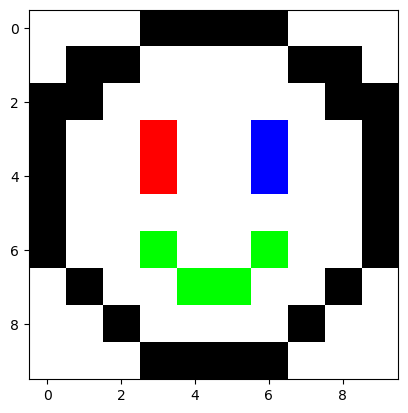

In [55]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image_data, interpolation='nearest')
plt.show()

## 5.2 논리배열을 이용한 인덱싱

In [63]:
a= np.arange(20)
a%2 ==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [65]:
a[[ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False]]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [67]:
a[a%2==0] # 논리 배열을 이용한 인덱싱 시 True 요소만 추출, 논리 배열은 1차원이므로, 1차원만 출력 가능

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [66]:
# a 에서 12보다 큰 값만 추출
a[a>12]

array([13, 14, 15, 16, 17, 18, 19])

# 6절. 선형대수
- 2차원 넘파이배열을 행렬
    - 행렬 곱 : @, dot(), 단위행렬(정방행렬)
    - 역행렬 : np.linalg.inv(행렬) -> 역행렬@행렬 = 단위행렬
    - 전치행렬 : 행렬.T / 행렬.transpose() 

In [69]:
a = np.array([[1,2],
            [3,4]])
a 

array([[1, 2],
       [3, 4]])

In [70]:
# a의 역행렬 <- 왜만들까? 단위행렬을 만들어 가중치를 구하기 위함이다
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [71]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1 선형 연립방정식 풀기(독립변수1,데이터2)

In [76]:
x = np.array([2,4])
Y = np.array([40,60])
X = np.dstack( (x, np.ones(len(x))) )
X

array([[[2., 1.],
        [4., 1.]]])

In [77]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y   / X의 역행렬 @ X = 단위행렬
# wb = X의 역행렬 @ Y
wb = np.linalg.inv(X) @ Y
wb

array([[10., 20.]])

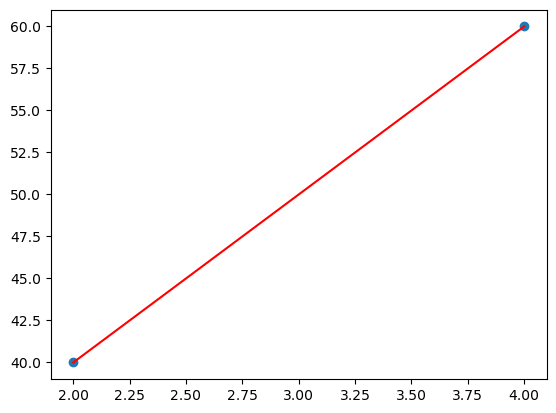

In [79]:
plt.scatter(x,y)  # 점 그래프로 점을 찍어줌
plt.plot(x, 10*x+20, 'r') # x와 y의 값을 받아 그 점을 잇는 선을 그려줌